<center><h1>Importing libraries</h1></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<center><h2>Reading the data</h2></center>

In [2]:
# reading the file
f = open('Index','r')
# printing the content of the file
print(f.read())
# closing the file
f.close()

Index of adult

02 Dec 1996      140 Index
10 Aug 1996  3974305 adult.data
10 Aug 1996     4267 adult.names
10 Aug 1996  2003153 adult.test



<b>Observations:</b>
<br>
The above only contains the index of the whole dataset

In [3]:
# reading the file
f = open('old.adult.names','r')
# printing the content of the file
print(f.read())
# closing the file
f.close()

1. Title of Database: adult
2. Sources:
   (a) Original owners of database (name/phone/snail address/email address)
       US Census Bureau.
   (b) Donor of database (name/phone/snail address/email address)
       Ronny Kohavi and Barry Becker, 
       Data Mining and Visualization
       Silicon Graphics.
       e-mail: ronnyk@sgi.com
   (c) Date received (databases may change over time without name change!)
       05/19/96
3. Past Usage:
   (a) Complete reference of article where it was described/used
        @inproceedings{kohavi-nbtree,
           author={Ron Kohavi},
           title={Scaling Up the Accuracy of Naive-Bayes Classifiers: a 
                  Decision-Tree Hybrid},
           booktitle={Proceedings of the Second International Conference on
                      Knowledge Discovery and Data Mining},
           year = 1996,
           pages={to appear}}
   (b) Indication of what attribute(s) were being predicted 
       Salary greater or less than 50,000.
   (b) Indica

<b>Observations:</b>
<br>
The above file only contains general description of the overall dataset   

In [4]:
# reading the file
f = open('adult.names','r')
# printing the content of the file
print(f.read())
# closing the file
f.close()

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

<b>Observations:</b>
<br>
The above file only contains general description of the overall dataset  

<center><h1>Reading the train and test data</h1></center>

In [5]:
# defining the column headers
columns = ['age','workclass','fnlwgt','education','education-num','martial-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
# Loading the files in the dataframe
train = pd.read_csv('adult.data', names = columns)
test = pd.read_csv('adult.test', names = columns)

<b>Observations</b>:
<br>
This is the main data on which we will be performing clustering

<center><h1>Combining the train and test set</h1></center>

In [6]:
#Combining the dataframes into a single dataframe
df = pd.concat([train, test], ignore_index=True)

<b>Note:</b> As we are performing clustering and not classification, we can combine both the datasets. The more data we have the better the performance of the clustering algorithm

<center><h1>Exploring the data</h1></center>

In [7]:
# Taking a look at the sneek peek in the data
df.head(5)

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


<b>Observations:</b>
<br>
As we can see from the above records, we have mix features where 6 features are numerical and the remaining are categorical

In [8]:
# Checking the rows and columns in the dataframe
df.shape

(48843, 15)

<b>Observations:</b>
<br>
From the above, we can see that we have a total of 48843 records and 15 columns

In [9]:
# Checking the general information of dataframe, column and its types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48843 non-null  object 
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  float64
 5   martial-status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  float64
 11  capital-loss    48842 non-null  float64
 12  hours-per-week  48842 non-null  float64
 13  native-country  48842 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(5), object(10)
memory usage: 5.6+ MB


<b>Observations:</b>
<br>
The above info provide us with the column names and the type of data each column contains. It also shows how many records have no null values
<br>
From the above, we can see that only age is having extra valuewhen compared to all the other columns
<br>

<center><h1>Checking for any Missing values</h1></center>

In [10]:
# Checking if any missing values in the dataset
df.isnull().values.any()

True

<b>Observations:</b>
<br>
From above, we can see that we have atleast some missing values present in the dataset

In [11]:
# Getting the total count of missing values 
df.isnull().values.sum()

14

<b>Observations:</b>
<br>
We are having total 14 records having nan values

In [12]:
df[df.isnull().values]

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32561,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32561,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32561,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32561,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32561,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32561,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32561,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32561,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32561,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32561,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Observations:</b>
<br>
From above, we can see that all the columns except age contain nan values. The value containing in the age column is also incorrect, so we can drop all the records

<center><h1>Removing the missing values</h1></center>

In [13]:
def removeNAN(X):
    '''This function removes the missing values from the dataset'''
    # Checking if any missing values
    if X.isnull().values.any() == True:
        # returning the dataset after removing the missing values
        return X.dropna()
    # if no missing values
    else:
        # returning the dataset as it is
        return X

In [14]:
# removing the missing values
df = removeNAN(df)

In [15]:
df[df.isnull().values]

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


<b>Note:</b> We can see above no nan values now, meaning all the records having nan values have been removed

<center><h1>Summary of the numerical features</h1></center>

In [16]:
# Checking the various stats on the numerical features in the dataframe
df.describe()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<b>Observations:</b>
<br>
From the above measures, we can see that age being a numerical feature, we are not seeing anything related to it.

<center><h1>Changing the type of age column</h1></center>

In [17]:
# Changing the column type from string to integer
df.age = df.age.astype('int')
# Checking if any change happened 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int32  
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  float64
 5   martial-status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  float64
 11  capital-loss    48842 non-null  float64
 12  hours-per-week  48842 non-null  float64
 13  native-country  48842 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(5), int32(1), object(9)
memory usage: 5.8+ MB


<b>Note:</b> We can see that the type of age has changed from object to integer

<center><h1>Summary of the numerical features</h1></center>

In [18]:
# Checking the various stats on the numerical features in the dataframe
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<b>Observations:</b>
<br>
We can see that the range of age is from 17 years to 90 years, with mean age being 38-39 years
<br>
We can see that the values in column fnlwgt but can't understand fully about it
<br>
We can see that the column education-num has the range of values from 1 to 16, with mean being 10.
<br>
The values in capital-gain column starts from 0 and ends on 9999, with mean value being 1079.
<br>
The values in capital-loss column starts from 0 and ends on 4356, with mean value being 87.5.
<br>
The values in hours-per-week column starts from 1 hour and ends on 99 hours, with mean value being 40.42 hours.

<center><h1>Univariate Analysis</h1></center>

In [19]:
def getUnique(X, column):
    '''This function returns the unique value that a particular column contains in the dataset'''
    return X[column].unique()

def getValueCounts(X,column):
    '''This function returns the unique values in a column with its total count in the dataset'''
    return X[column].value_counts()

In [20]:
# Checking the distinct values present in the age column
getUnique(df, 'age')

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87, 89])

<b>Note:</b> Above distinct values that are present in age column are shown.

In [21]:
# Checking the distinct values present in the workclass column
getUnique(df, 'workclass')

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

<b>Observations:</b>
<br>
Above the distinct categories which are present in workclass column are shown. In this, we can see ' ?' which means missing values as described in the adult.names file

In [22]:
# Checking the count of distinct values in workclass column
getValueCounts(df,'workclass')

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

<b>Observations:</b>
<br>
Private is category which is present the most in the dataset in workclass column
<br>
' ?' representing missing value amounts to 2799 records in workclass column
<br>
Never-worked is the category having the least records constituting to only 10 records

In [23]:
# Checking the distinct values present in the fnlwgt column
getUnique(df, 'fnlwgt')

array([ 77516.,  83311., 215646., ..., 173449.,  89686., 350977.])

In [24]:
# Checking the total count of distinct values in fnlwgt column
df['fnlwgt'].unique().shape

(28523,)

<b>Observations:</b>
<br>
We have total 28523 distinct values in fnlwgt column

In [25]:
# Checking the distinct values present in the education column
getUnique(df, 'education')

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

<b>Observations:</b>
<br>
Education column contains the level of study a particular person has done.

In [26]:
# Checking the count of distinct values in education column
getValueCounts(df,'education')

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

<b>Observations:</b>
<br>
Most people have completed their education till High School

In [27]:
# Checking the distinct values present in the education-num column
getUnique(df, 'education-num')

array([13.,  9.,  7., 14.,  5., 10., 12., 11.,  4., 16., 15.,  3.,  6.,
        2.,  1.,  8.])

In [28]:
# Checking the distinct values present in the martial-status column
getUnique(df, 'martial-status')

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [29]:
# Checking the count of distinct values in martial-status column
getValueCounts(df,'martial-status')

 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: martial-status, dtype: int64

<b>Observations:</b>
<br>
Married-civ-spouse category is the most that is present in martial-status column
<br>
Married-AF-spouse is the least value present

In [30]:
# Checking the distinct values present in the occupation column
getUnique(df, 'occupation')

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

<b>Observations:</b>
<br>
There are missing values present in the occupation column

In [31]:
# Checking the count of distinct values in occupation column
getValueCounts(df,'occupation')

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

<b>Observations:</b>
<br>
Prof-specialty category is the most that is present in occupation column
<br>
Armed-Forces is the least value present
<br>
We can also see missing values in occupation column

In [32]:
# Checking the distinct values present in the relationship column
getUnique(df, 'relationship')

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [33]:
# Checking the count of distinct values in relationship column
getValueCounts(df,'relationship')

 Husband           19716
 Not-in-family     12583
 Own-child          7581
 Unmarried          5125
 Wife               2331
 Other-relative     1506
Name: relationship, dtype: int64

<b>Observations:</b>
<br>
Husband is the value that is present the most in relationship column
<br>
Other-relative is the least value present

In [34]:
# Checking the distinct values present in the race column
getUnique(df, 'race')

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [35]:
# Checking the count of distinct values in race column
getValueCounts(df,'race')

 White                 41762
 Black                  4685
 Asian-Pac-Islander     1519
 Amer-Indian-Eskimo      470
 Other                   406
Name: race, dtype: int64

<b>Observations:</b>
<br>
White people constitute major part of the data 
<br>
Other being the least common.

In [36]:
# Checking the distinct values present in the sex column
getUnique(df, 'sex')

array([' Male', ' Female'], dtype=object)

In [37]:
# Checking the count of distinct values in sex column
getValueCounts(df,'sex')

 Male      32650
 Female    16192
Name: sex, dtype: int64

<b>Observations:</b>
<br>
It can be seen that the data is imbalanced here, with male being much more than the female

In [38]:
# Checking the distinct values present in the capital-gain column
getUnique(df, 'capital-gain')

array([ 2174.,     0., 14084.,  5178.,  5013.,  2407., 14344., 15024.,
        7688., 34095.,  4064.,  4386.,  7298.,  1409.,  3674.,  1055.,
        3464.,  2050.,  2176.,   594., 20051.,  6849.,  4101.,  1111.,
        8614.,  3411.,  2597., 25236.,  4650.,  9386.,  2463.,  3103.,
       10605.,  2964.,  3325.,  2580.,  3471.,  4865., 99999.,  6514.,
        1471.,  2329.,  2105.,  2885., 25124., 10520.,  2202.,  2961.,
       27828.,  6767.,  2228.,  1506., 13550.,  2635.,  5556.,  4787.,
        3781.,  3137.,  3818.,  3942.,   914.,   401.,  2829.,  2977.,
        4934.,  2062.,  2354.,  5455., 15020.,  1424.,  3273., 22040.,
        4416.,  3908., 10566.,   991.,  4931.,  1086.,  7430.,  6497.,
         114.,  7896.,  2346.,  3418.,  3432.,  2907.,  1151.,  2414.,
        2290., 15831., 41310.,  4508.,  2538.,  3456.,  6418.,  1848.,
        3887.,  5721.,  9562.,  1455.,  2036.,  1831., 11678.,  2936.,
        2993.,  7443.,  6360.,  1797.,  1173.,  4687.,  6723.,  2009.,
      

In [39]:
# Checking the records where capital-gain column is 0
df[df['capital-gain']==0]

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,33,Private,245211.0,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K.
48838,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
48839,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
48840,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.


In [40]:
# Checking the total number of records where capital-gain column is 0
df[df['capital-gain']==0].shape

(44807, 15)

<b>Observations:</b>
<br>
Capital-gain column contains 0 value in almost 44807 records

In [41]:
# Checking the distinct values present in the capital-loss column
getUnique(df, 'capital-loss')

array([   0., 2042., 1408., 1902., 1573., 1887., 1719., 1762., 1564.,
       2179., 1816., 1980., 1977., 1876., 1340., 2206., 1741., 1485.,
       2339., 2415., 1380., 1721., 2051., 2377., 1669., 2352., 1672.,
        653., 2392., 1504., 2001., 1590., 1651., 1628., 1848., 1740.,
       2002., 1579., 2258., 1602.,  419., 2547., 2174., 2205., 1726.,
       2444., 1138., 2238.,  625.,  213., 1539.,  880., 1668., 1092.,
       1594., 3004., 2231., 1844.,  810., 2824., 2559., 2057., 1974.,
        974., 2149., 1825., 1735., 1258., 2129., 2603., 2282.,  323.,
       4356., 2246., 1617., 1648., 2489., 3770., 1755., 3683., 2267.,
       2080., 2457.,  155., 3900., 2201., 1944., 2467., 2163., 2754.,
       2472., 1411., 1429., 3175., 1510., 1870., 1911., 2465., 1421.])

In [42]:
# Checking the records where capital-loss column is 0
df[df['capital-loss']==0]

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
48839,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
48840,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
48841,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [43]:
# Checking the total number of records where capital-loss column is 0
df[df['capital-loss']==0].shape

(46560, 15)

<b>Observations:</b>
<br>
Capital-loss column contains 0 in 46560 records

In [44]:
# Checking the distinct values present in the hours-per-week column
getUnique(df, 'hours-per-week')

array([40., 13., 16., 45., 50., 80., 30., 35., 60., 20., 52., 44., 15.,
       25., 38., 43., 55., 48., 58., 32., 70.,  2., 22., 56., 41., 28.,
       36., 24., 46., 42., 12., 65.,  1., 10., 34., 75., 98., 33., 54.,
        8.,  6., 64., 19., 18., 72.,  5.,  9., 47., 37., 21., 26., 14.,
        4., 59.,  7., 99., 53., 39., 62., 57., 78., 90., 66., 11., 49.,
       84.,  3., 17., 68., 27., 85., 31., 51., 77., 63., 23., 87., 88.,
       73., 89., 97., 94., 29., 96., 67., 82., 86., 91., 81., 76., 92.,
       61., 74., 95., 79., 69.])

In [45]:
# Checking the distinct values present in the native-country column
getUnique(df, 'native-country')

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

<b>Observations:</b>
<br>
Native-country column contains missing values

In [46]:
# Checking the count of distinct values in native-country column
getValueCounts(df,'native-country')

 United-States                 43832
 Mexico                          951
 ?                               857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 

<b>Observations:</b>
<br>
Most of the people reside in United states.
<br>
There are about 857 records having missing values
<br>
Holand - Netherlands is least present in the data

In [47]:
# Checking the distinct values present in the income column
getUnique(df, 'income')

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

<b>Observations:</b>
<br>
We can see that we have ambiguous categories in income column. We will need to replace with correct values

In [48]:
# Replacing the ambigous entries in income column
df.income.replace(" <=50K."," <=50K", inplace = True)
df.income.replace(" >50K."," >50K", inplace = True)

In [49]:
# Checking the count of distinct values in income column
getValueCounts(df,'income')

 <=50K    37155
 >50K     11687
Name: income, dtype: int64

<b>Observations:</b>
<br>
Here we can see that there is a class imbalance. Most of the records belong to '<=50K' category

<center><h1>Replacing missing values with mode for categorical variable</h1></center>

In [50]:
# Replacing the missing entries in workclass column with its mode value 
df['workclass'].replace(' ?', df['workclass'].mode()[0], inplace = True)
# Replacing the missing entries in occupation column with its mode value 
df['occupation'].replace(' ?', df['occupation'].mode()[0],inplace = True)
# Replacing the missing entries in native-country column with its mode value 
df['native-country'].replace(' ?', df['native-country'].mode()[0], inplace = True)

In [51]:
# Checking if the missing entries have been replaced in the workclass column
getValueCounts(df, 'workclass')

 Private             36705
 Self-emp-not-inc     3862
 Local-gov            3136
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

<b>Note:</b> Now no missing values are present in the workclass column

In [52]:
# Checking if the missing entries have been replaced in the occupation column
getValueCounts(df, 'occupation')

 Prof-specialty       8981
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

<b>Note:</b> Now no missing values are present in the occupation column

In [53]:
# Checking if the missing entries have been replaced in the native-country column
getValueCounts(df, 'native-country')

 United-States                 44689
 Mexico                          951
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 Peru                             46
 

<b>Note:</b> Now no missing values are present in the native-country column

<center><h1>Checking for duplicate rows</h1></center>

In [54]:
# Checking for total number of duplicate records in the data
df[df.duplicated(keep='first')].shape[0]

53

<b>Observations:</b>
<br>
We are having 29 duplicate records in the dataset

In [55]:
# Displaying the duplicate records
df[df.duplicated(keep='first')]

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144.0,Bachelors,13.0,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,40.0,Mexico,<=50K
5104,90,Private,52386.0,Some-college,10.0,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0.0,0.0,35.0,United-States,<=50K
9171,21,Private,250051.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,10.0,United-States,<=50K
11631,20,Private,107658.0,Some-college,10.0,Never-married,Tech-support,Not-in-family,White,Female,0.0,0.0,10.0,United-States,<=50K
13084,25,Private,195994.0,1st-4th,2.0,Never-married,Priv-house-serv,Not-in-family,White,Female,0.0,0.0,40.0,Guatemala,<=50K
15059,21,Private,243368.0,Preschool,1.0,Never-married,Farming-fishing,Not-in-family,White,Male,0.0,0.0,50.0,Mexico,<=50K
17040,46,Private,173243.0,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
18555,30,Private,144593.0,HS-grad,9.0,Never-married,Other-service,Not-in-family,Black,Male,0.0,0.0,40.0,United-States,<=50K
18698,19,Private,97261.0,HS-grad,9.0,Never-married,Farming-fishing,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
21318,19,Private,138153.0,Some-college,10.0,Never-married,Adm-clerical,Own-child,White,Female,0.0,0.0,10.0,United-States,<=50K


<center><h1>Removing the duplicate rows</h1></center>

In [56]:
# removing the duplicate records from the data
df.drop_duplicates(inplace=True)

In [57]:
# Checking for total number of duplicate records in the data
df[df.duplicated(keep='first')].shape[0]

0

<b>Note:</b> Now no duplicate rows are present in the dataset

<center><h1>Removing the income column</h1></center>

In [58]:
# saving the income column before removing it
income = df['income']
# dropping the income column
df.drop(columns = ['income'], inplace = True)

<b>Note:</b> As we are performing clustering, we have no use of income column, so we can remove the same

In [59]:
# checking if the income column has been dropped or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48789 entries, 0 to 48842
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48789 non-null  int32  
 1   workclass       48789 non-null  object 
 2   fnlwgt          48789 non-null  float64
 3   education       48789 non-null  object 
 4   education-num   48789 non-null  float64
 5   martial-status  48789 non-null  object 
 6   occupation      48789 non-null  object 
 7   relationship    48789 non-null  object 
 8   race            48789 non-null  object 
 9   sex             48789 non-null  object 
 10  capital-gain    48789 non-null  float64
 11  capital-loss    48789 non-null  float64
 12  hours-per-week  48789 non-null  float64
 13  native-country  48789 non-null  object 
dtypes: float64(5), int32(1), object(8)
memory usage: 5.4+ MB


<b>Note:</b> Now no income column is present in the dataset

<center><h1>Outlier Analysis</h1></center>

age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
fnlwgt            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
education-num     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
capital-gain         AxesSubplot(0.125,0.391471;0.227941x0.222059)
capital-loss      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
hours-per-week    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

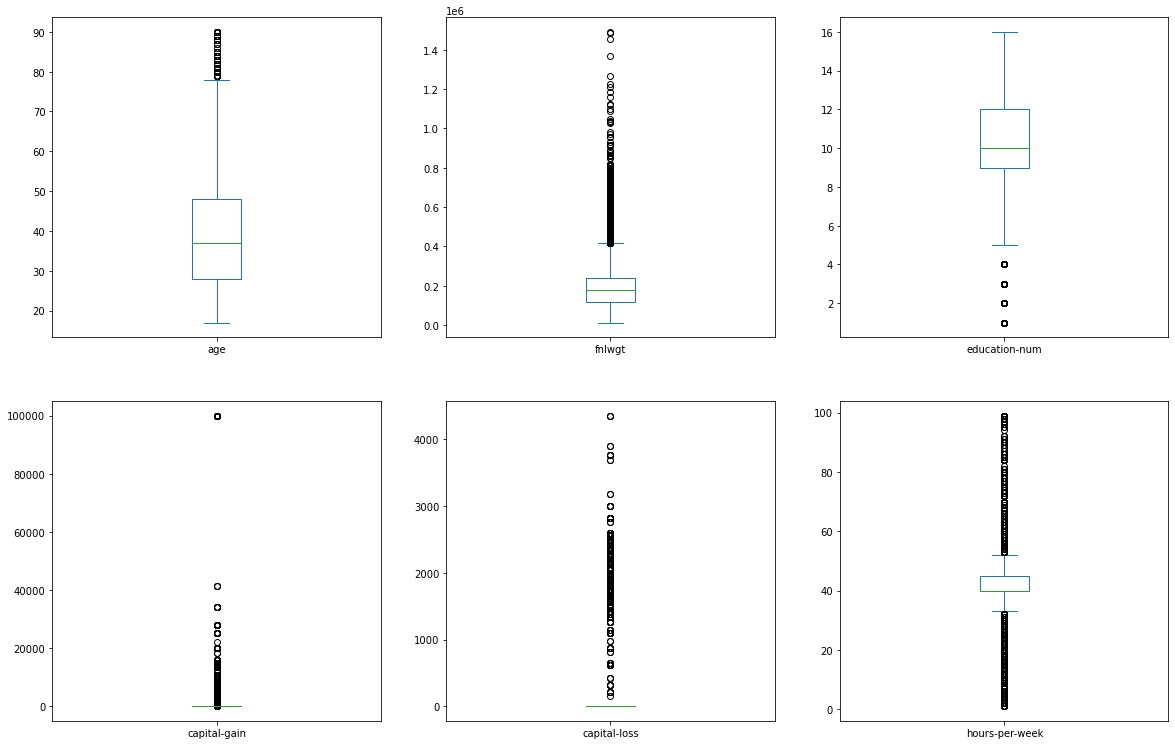

In [60]:
# Plotting box plot for checking the outliers
df.plot(kind='box', subplots = True, layout = (3,3), figsize = (20,20))

<b>Observations:</b>
<br>
We can observe that there are many outliers present in all the numerical columns

<center><h1>Multivariate Analysis</h1></center>

In [61]:
def bargraph(X,column1,column2, r=0):
    '''This function plots a bar graph for the two columns given in the dataset'''
    # creating a table before plotting
    crosstb = pd.crosstab(X[column1],X[column2])
    # Representing the table as bar graph 
    barplot = crosstb.plot.bar(rot=r, figsize=(10,10))
    # returning the created bar graph
    return barplot

<AxesSubplot:xlabel='workclass'>

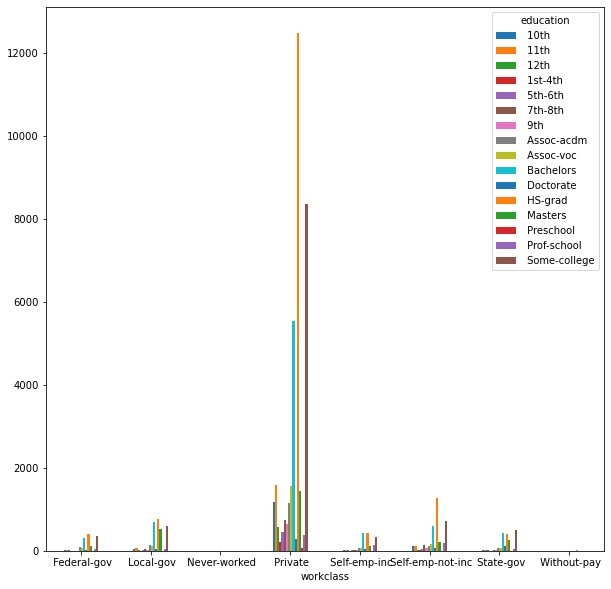

In [62]:
# Plotting the column workclass and education as bar graph to observe the distribution of values
bargraph(df,'workclass','education')

<b>Observations:</b>
<br>
From the above plot, we can observe that Private is having the largest value distribution. Most of which correspond to HS-grad in the education column, followed by some-college and then bachelors
<br>
We do not observe many values in Never-worked and Without-pay category with respect to education column
<br>
Other categories have similar values

<AxesSubplot:xlabel='workclass'>

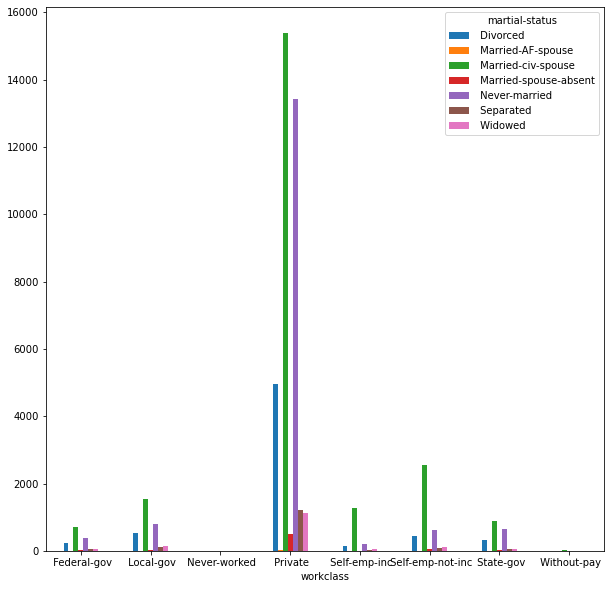

In [63]:
# Plotting the column workclass and martial-status as bar graph to observe the distribution of values
bargraph(df,'workclass','martial-status')

<b>Observations:</b>
<br>
In bar graph between workclass and martial-status, private is the most largest in workclass with Married-civ-spouse constituting the majorly, followed by Never-married and then divorced in martial-status column
<br>
We do not observe many values in Never-worked and Without-pay category with respect to martial-status column
<br>
Other categories are having similar values

<AxesSubplot:xlabel='workclass'>

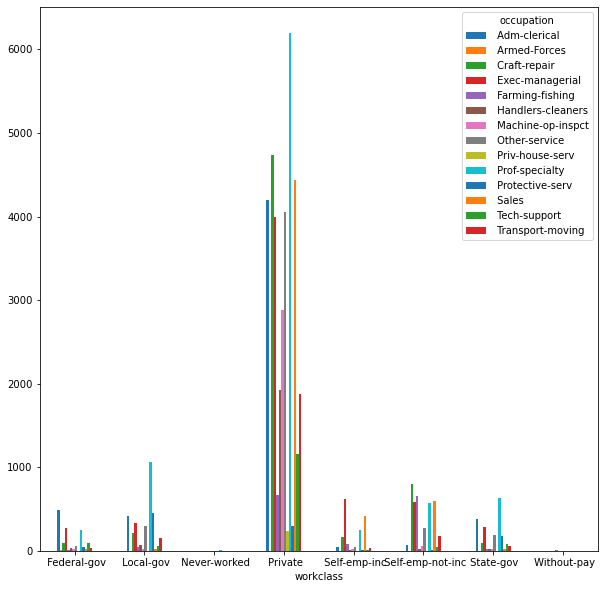

In [64]:
# Plotting the column workclass and occupation as bar graph to observe the distribution of values
bargraph(df,'workclass','occupation')

<b>Observations:</b>
<br>
In bar graph between workclass and occupation, private is the most largest in workclass with Prof-specialty constituting the majorly, followed by Craft-repair and then Sales in occupation column
<br>
We do not observe many values in Never-worked and Without-pay category with respect to occupation column
<br>
Other categories are having similar values

<AxesSubplot:xlabel='workclass'>

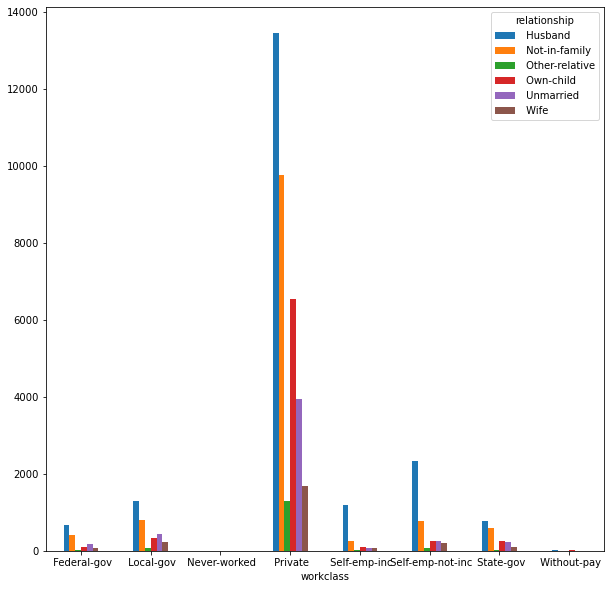

In [65]:
# Plotting the column workclass and relationship as bar graph to observe the distribution of values
bargraph(df,'workclass','relationship')

<b>Observations:</b>
<br>
In bar graph between workclass and relationship, private is the most largest in workclass with major being Husband, followed by Not-in-family and then Own-child in relationship column
<br>
We do not observe many values in Never-worked and Without-pay category with respect to relationship column
<br>
Other categories are having similar values

<AxesSubplot:xlabel='workclass'>

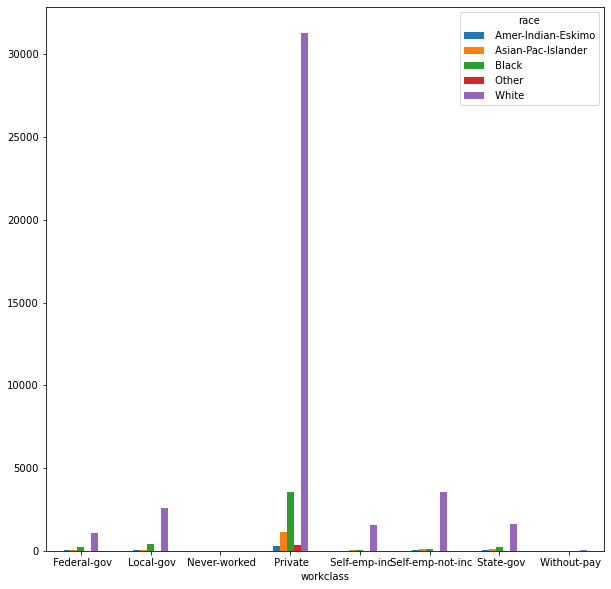

In [66]:
# Plotting the column workclass and race as bar graph to observe the distribution of values
bargraph(df,'workclass','race')

<b>Observations:</b>
<br>
In bar graph between workclass and martial-status, private is the most largest in workclass with White constituting the majorly, followed by Black in race column
<br>
We do not observe many values in Never-worked and Without-pay category with respect to race column
<br>
Other categories are having similar values

<AxesSubplot:xlabel='workclass'>

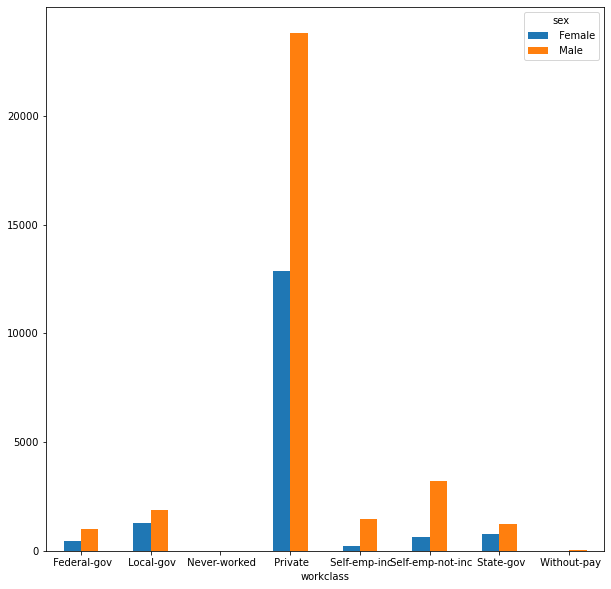

In [67]:
# Plotting the column workclass and sex as bar graph to observe the distribution of values
bargraph(df,'workclass','sex')

<b>Observations:</b>
<br>
In bar graph between workclass and sex, private is  the most largest in workclass with Male constituting the majorly and then female in sex column
<br>
We do not observe many values in Never-Worked and Without-pay category with respect to sex column
<br>
Other categories are having similar values

<AxesSubplot:xlabel='workclass'>

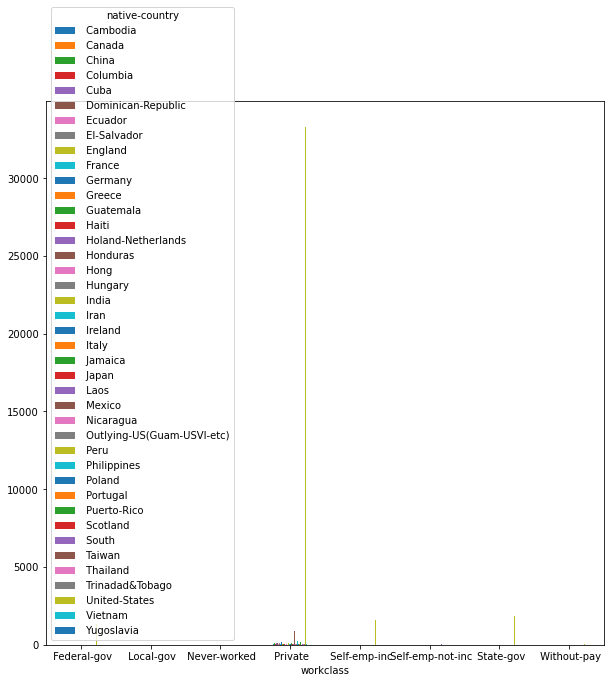

In [68]:
# Plotting the column workclass and native-country as bar graph to observe the distribution of values
bargraph(df,'workclass','native-country')

<b>Observations:</b>
<br>
In bar graph between workclass and native-country, private is the most largest in workclass with United-States being most common country.
<br>
We do not observe many values in Without-pay category with respect to native-country column
<br>
Other categories are having similar values

<AxesSubplot:xlabel='education'>

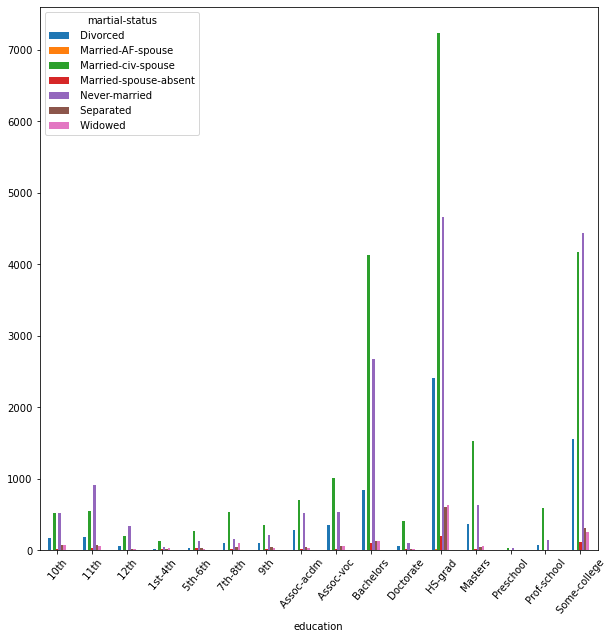

In [69]:
# Plotting the column education and martial-status as bar graph to observe the distribution of values
bargraph(df,'education','martial-status', 50)

<b>Observations:</b>
<br>
In bar graph between education and martial-status, HS-grad is the most largest in education with Married-civ-spouse constituting the majorly, followed by Never-married and then divorced in martial-status column.
<br>
Some college is the second most common category in education, here a large subcategory is never-married in martial-status, followed by Married-civ-spouse and then divorced
<br>
Bachelors follow the same trend as HS-grad

<AxesSubplot:xlabel='education'>

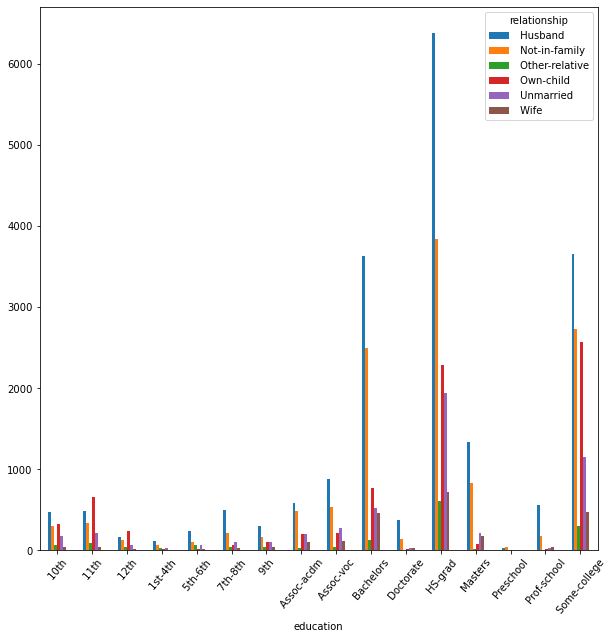

In [70]:
# Plotting the column education and relationship as bar graph to observe the distribution of values
bargraph(df,'education','relationship',50)

<b>Observations:</b>
<br>
In bar graph between education and relationship, HS-grad is the most largest in education with Husband constituting the majorly, followed by Not-in family and then own child in relationship column.
<br>
Some college and Bachelors follow the same trend as HS-grad

<AxesSubplot:xlabel='education'>

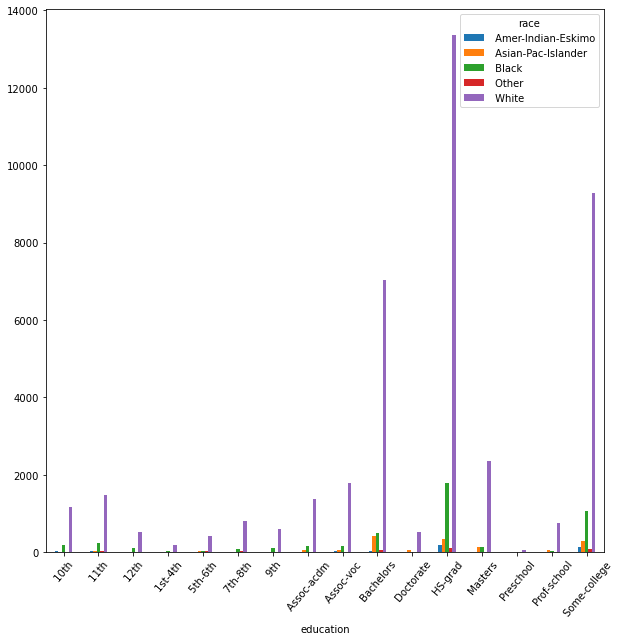

In [71]:
# Plotting the column education and race as bar graph to observe the distribution of values
bargraph(df,'education','race',50)

<b>Observations:</b>
<br>
In bar graph between education and race, HS-grad is the most largest in education with White constituting the majorly, followed by black in race column.
<br>
Other category follow a similar trend as HS-grad

<AxesSubplot:xlabel='education'>

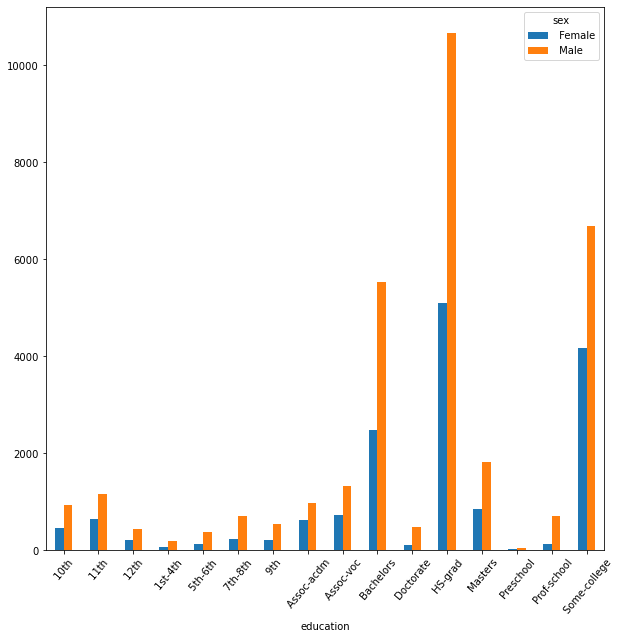

In [72]:
# Plotting the column education and sex as bar graph to observe the distribution of values
bargraph(df,'education','sex',50)

<b>Observations:</b>
<br>
In bar graph between education and sex, HS-grad is the most largest in education with Male constituting the majorly, followed by female in sex column.
<br>
Other categories follow a similar trend as HS-grad

<AxesSubplot:xlabel='martial-status'>

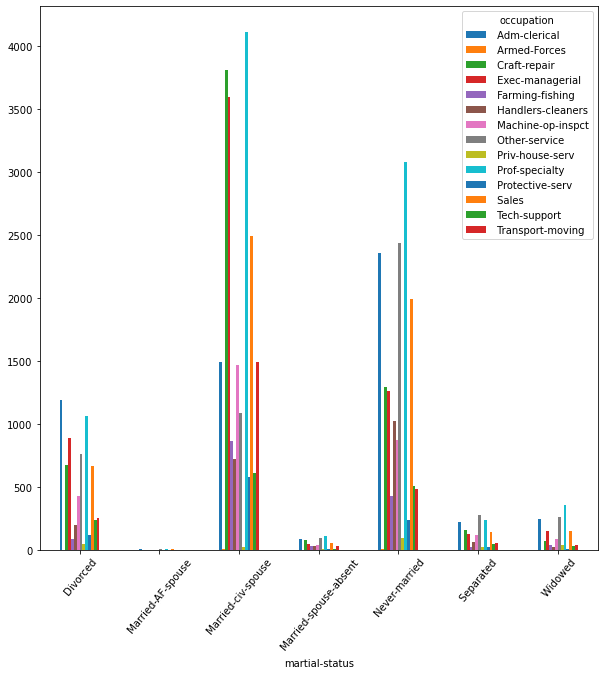

In [73]:
# Plotting the column martial-status and occupation as bar graph to observe the distribution of values
bargraph(df,'martial-status','occupation',50)

<b>Observations:</b>
<br>
In bar graph between martial-status and occupation, Married-civ-spouse is the largest in the martial-status with major being Prof-specalty in occupatin column
<br>
Never married is also similar to married-civ-spuse

<AxesSubplot:xlabel='martial-status'>

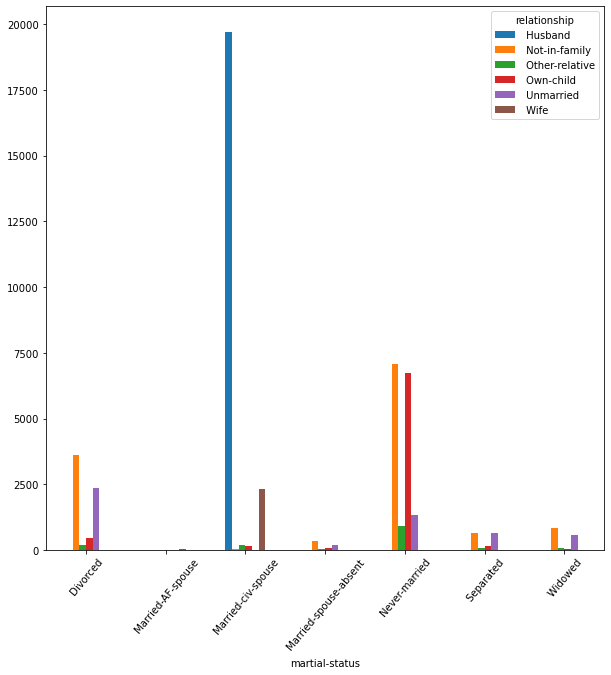

In [74]:
# Plotting the column martial-status and relationship as bar graph to observe the distribution of values
bargraph(df,'martial-status','relationship',50)

<b>Observations:</b>
<br>
In bar graph between martial-status and relationship, Married-civ-spouse is the largest in the martial-status with major having relationship of Husband followed by Wife
<br>
Never married is having Not-in family relationship as the highest followed by Own-child
<br>
Divorced is having the Not-in family relationship as the highest followed by Unmarried in relationship column

<AxesSubplot:xlabel='martial-status'>

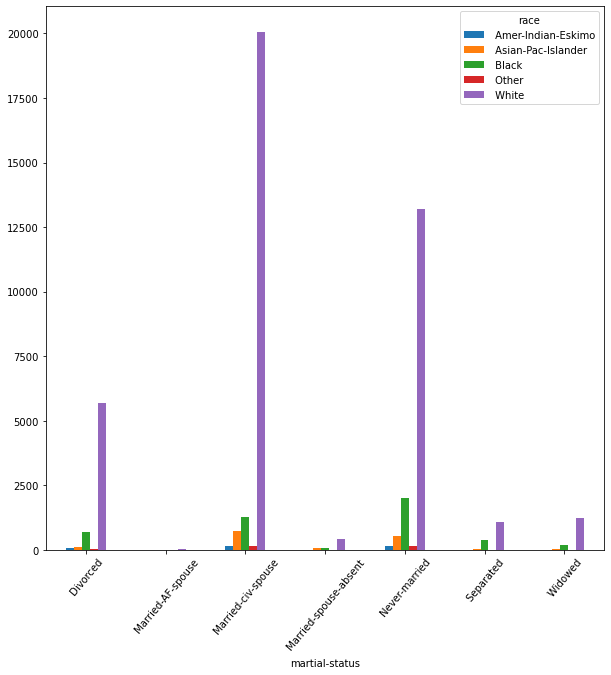

In [75]:
# Plotting the column martial-status and race as bar graph to observe the distribution of values
bargraph(df,'martial-status','race',50)

<b>Observations:</b>
<br>
In bar graph between martial-status and race, Married-civ-spouse is the largest in the martial-status with major being White followed by Black in race column
<br>
Other categories follow a similar trend

<AxesSubplot:xlabel='martial-status'>

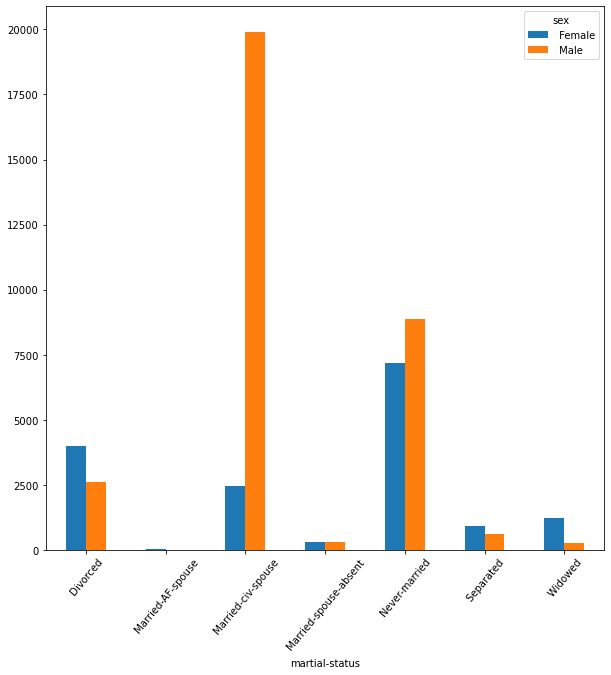

In [76]:
# Plotting the column martial-status and sex as bar graph to observe the distribution of values
bargraph(df,'martial-status','sex',50)

<b>Observations:</b>
<br>
In bar graph between martial-status and sex, Married-civ-spouse is the largest in the martial-status with major being Male followed by female
<br>
All other categories follow a similar trend except for Married-AF-Spouse and Married-spouse-absent
<br>
 Married-spouse-absent has nearly equal records
 <br>
 Married-AF-Spouse is having Male only

<AxesSubplot:xlabel='occupation'>

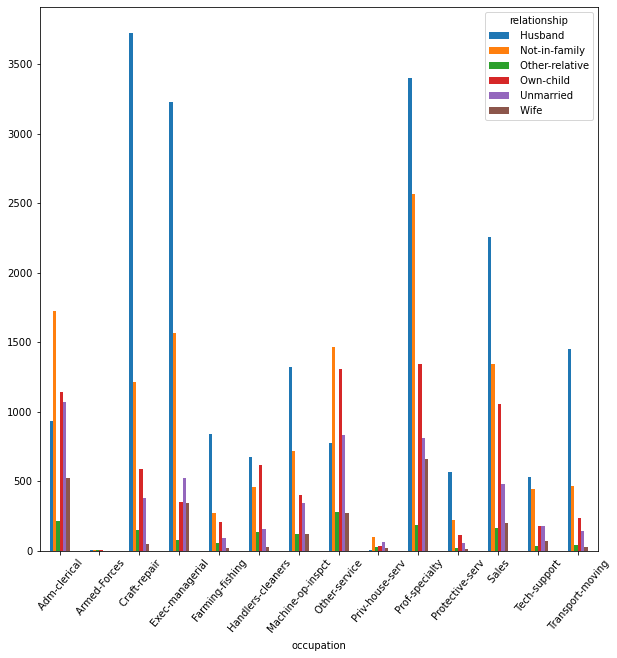

In [77]:
# Plotting the column occupation and relationship as bar graph to observe the distribution of values
bargraph(df,'occupation','relationship',50)

<AxesSubplot:xlabel='occupation'>

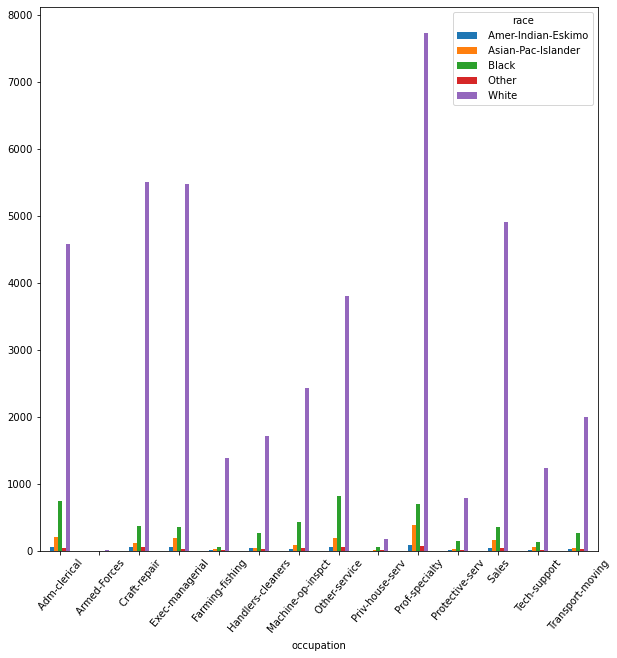

In [78]:
# Plotting the column occupation and race as bar graph to observe the distribution of values
bargraph(df,'occupation','race',50)

<b>Observations:</b>
<br>
In bar graph between occupation and race, White are the most common race followed by black in all the categories in occupation 

<AxesSubplot:xlabel='occupation'>

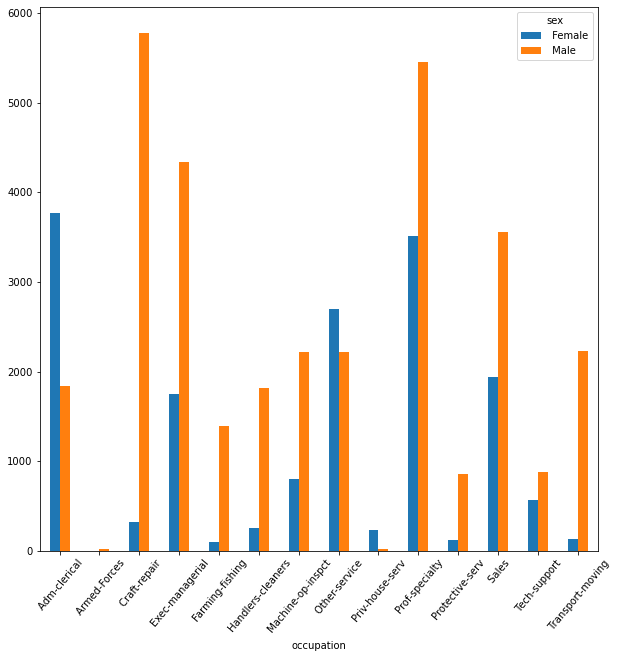

In [79]:
# Plotting the column occupation and race as bar graph to observe the distribution of values
bargraph(df,'occupation','sex',50)

<b>Observations:</b>
<br>
In bar graph between occupation and sex, we see  similar trend in all occupations that Male are much more than female except in Adm-clerical and Other-service

<AxesSubplot:xlabel='relationship'>

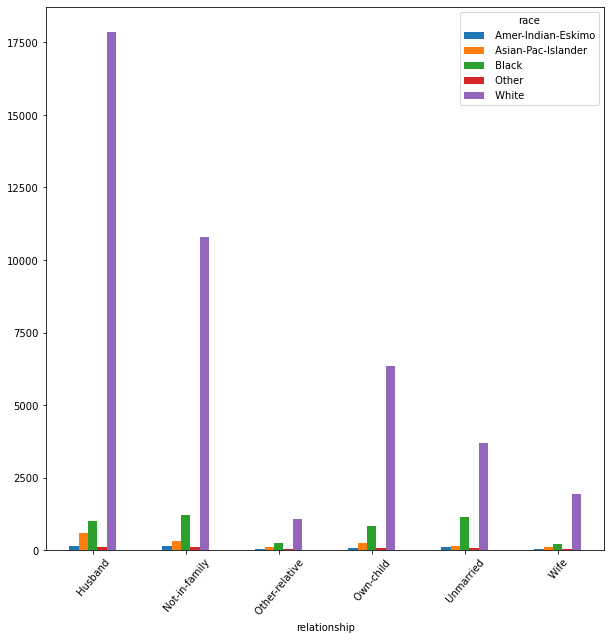

In [80]:
# Plotting the column relationship and race as bar graph to observe the distribution of values
bargraph(df,'relationship','race',50)

<b>Observations:</b>
<br>
In bar graph between relationship and race, we see that White are the most common in all the relationship followed by black 

<AxesSubplot:xlabel='relationship'>

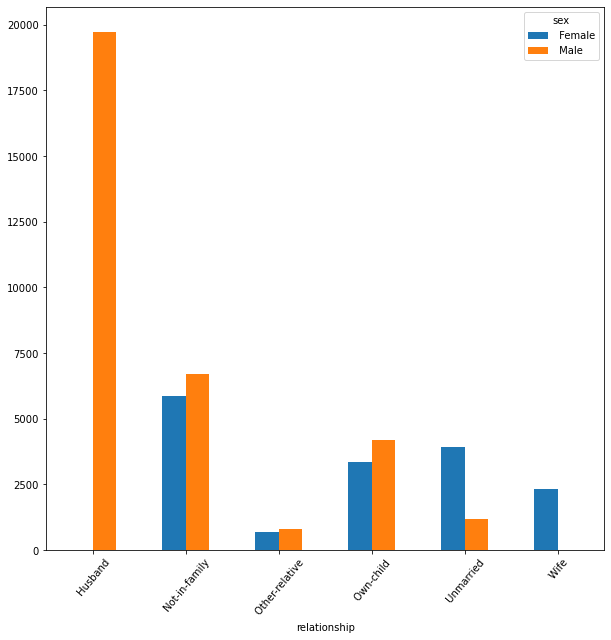

In [81]:
# Plotting the column relationship and sex as bar graph to observe the distribution of values
bargraph(df,'relationship','sex',50)

<b>Observations:</b>
<br>
In bar graph between relationship and sex, we can see that Husband are all male which is to be expected and wife are all female.
<br>
We see a similar trend in Not-in family and Other-relative relationships that male are more than females
<br>
In unmarried relationship, we see female much more compared to male

<AxesSubplot:xlabel='race'>

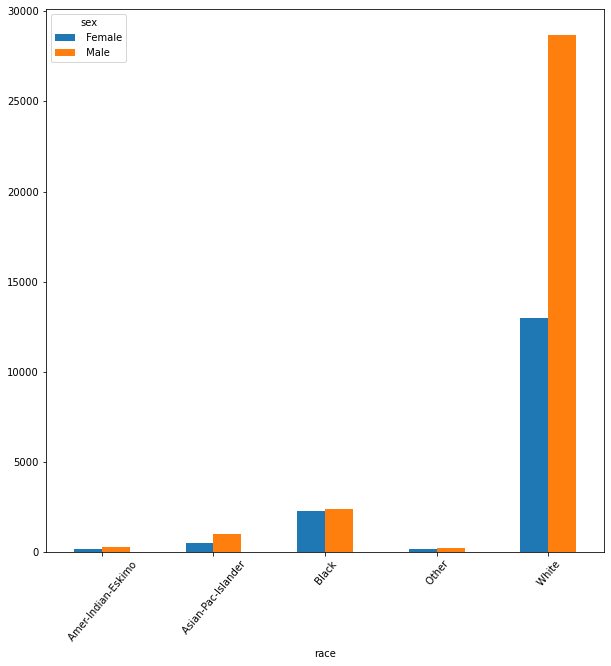

In [82]:
# Plotting the column race and sex as bar graph to observe the distribution of values
bargraph(df,'race','sex',50)

<b>Observations:</b>
<br>
In bar graph between race and sex, we see White are the most common race and Male being more compared to female.
<br>
All the other race follow a similar trend as White race

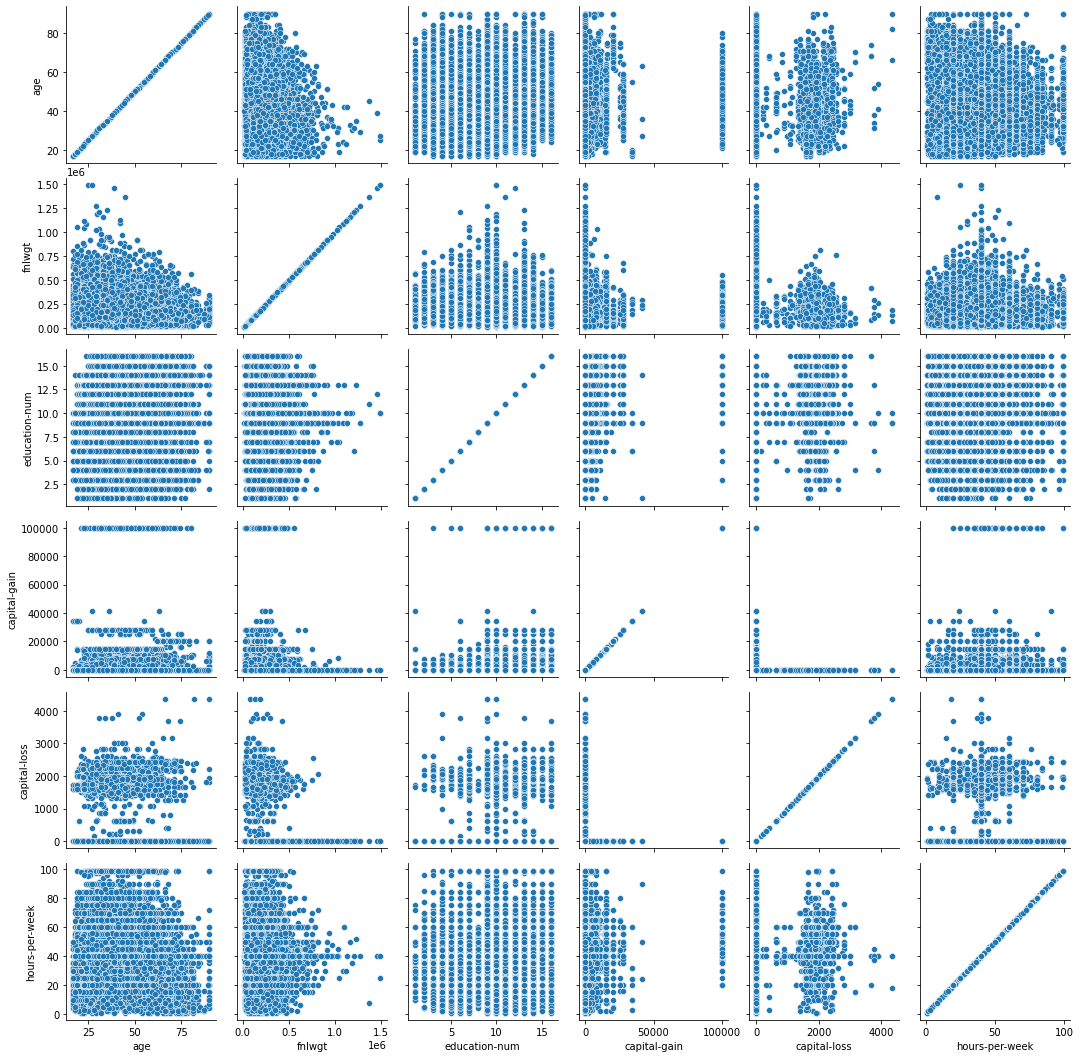

In [83]:
# Creating a pairgrid
g = sns.PairGrid(df)
# plotting it in a scatterplot manner
g.map(sns.scatterplot)

<b>Observations:</b>
<br>
From the above graph, not much can be deduced

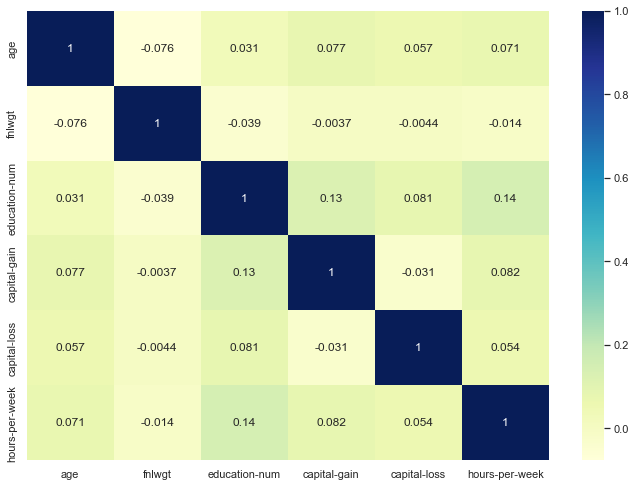

In [84]:
# setting the figure size
sns.set(rc={'figure.figsize':(11.7,8.27)})
# plotting the correlation as heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
# showing the plot
plt.show()

<b>Observations:</b>
<br>
In the above correlation diagram, we do not observe any significant correaltion between the numerical columns

<center><h1>Saving the original dataframe</h1></center>

In [85]:
# Before performing any encoding or normalization, saving the data in original format
df1 = df.copy()

### Encoding the categorical variables

In [86]:
def encode(X,column):
    '''This function is used for converting categorical features into numerical'''
    # One-hot encding the categorical variable
    dummy = pd.get_dummies(X[column])
    # Concatenating the extra columns
    X = pd.concat([df, dummy], axis=1)
    # dropping the original column
    X.drop(columns = [column], inplace = True)
    # returning the dataframe
    return X

In [87]:
# defining the categorical features / columns
columns = ['workclass', 'education','martial-status', 'occupation', 'relationship', 'race', 'sex','native-country']
# looping over the columns
for i in columns:
    # Converting the categorical features into numerical
    df = encode(df, i)

<b>Note:</b> We need to perform encode or convert the categorical variables into numerical so that clustering algorith can work on the dataset. Clustering algorithm only works on numerical features

<center><h1>Performing Min-Max normalization on the numerical features</h1></center>

In [88]:
def minMaxNorm(df,column):
    '''This function performs the min-max normalization and each feature will then fall in range between 0-1'''
    # creating a object of the minmaxscaler class
    scaler = MinMaxScaler()
    # Finding the best result
    scaler.fit(df[column].values.reshape(-1, 1))
    # # transforming the feature in the range of 0-1
    result_X = scaler.transform(df[column].values.reshape(-1, 1))
    # returning the result
    return result_X

In [89]:
# defining the numerical features
columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
# looping over the numerical features
for i in columns:
    # Performing min-max normalization on the numerical feature
    df[i]= minMaxNorm(df, i)

<b>Note:</b> We need to perform min max normalization on the numerical features so that all the features are on a siilar scale

In [90]:
# Checking the various stats on all features in the dataframe
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,Never-worked,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
count,48789.000000,48789.000000,48789.000000,48789.000000,48789.000000,48789.000000,48789.000000,48789.000000,48789.000000,48789.000000,...,48789.000000,48789.000000,48789.000000,48789.000000,48789.000000,48789.000000,48789.000000,48789.000000,48789.000000,48789.000000
mean,0.296618,0.120007,0.605254,0.010803,0.020110,0.402305,0.029351,0.064277,0.000205,0.751276,...,0.001373,0.003771,0.000430,0.002357,0.001332,0.000615,0.000553,0.915104,0.001763,0.000471
std,0.187787,0.071455,0.171338,0.074561,0.092565,0.126458,0.168790,0.245248,0.014315,0.432278,...,0.037032,0.061296,0.020742,0.048493,0.036476,0.024790,0.023518,0.278730,0.041948,0.021707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071219,0.533333,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.273973,0.112207,0.600000,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.424658,0.152439,0.733333,0.000000,0.000000,0.448980,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<b>Note:</b> From the above, it can be seen that all the features are now on a similar scale or range between 0 to 1

<center><h1>Model building and evaluating the performance</h1></center>

In [91]:
# initializing the parameters on which the kmeans clustering will work
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300, "random_state": 5}
# declaring a list to save the silhouette score for each cluster
silhouette_coefficients = []
# trying to find the best number of clusters
for k in range(2, 25):
    # running the kmeans on the given cluster and parameters
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    # trying to find the best clusters
    kmeans.fit(df)
    # calculating the silhouette score
    score = silhouette_score(df, kmeans.labels_)
    # adding the score to the list along with the number of cluster
    silhouette_coefficients.append([k,score])

In [92]:
# declaring two list, one for saving the number of clusters
index = []
# one for saving the silhouette scores
scores = []
# dividing the silhouette_coefficients into two
for i in silhouette_coefficients:
    # appending the number of clusters
    index.append(i[0])
    # appending the scores
    scores.append(i[1])
# finding the max score    
highest = max(scores)
# Getting the index corresponding to the score
num = scores.index(highest)
# Printing the max score and number of cluster
print("The highest silhouette score is "+str(max(scores))+" for clusters = "+str(index[num]))    

The highest silhouette score is 0.16672721111769015 for clusters = 3


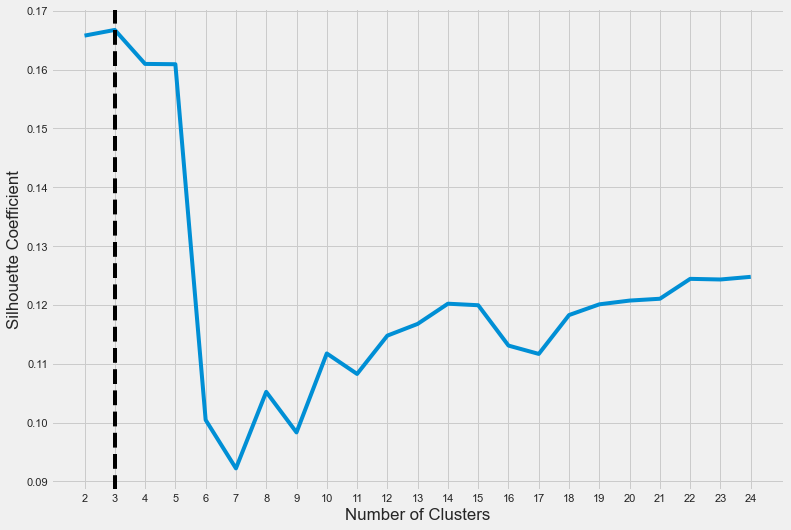

In [93]:
# Setting the style of graph to be used
plt.style.use("fivethirtyeight")
# defining the x and y axes
plt.plot(range(2, 25), scores)
# defining the start and end of x-axis
plt.xticks(range(2, 25))
# Plotting the most highest silhouette score
plt.axvline(x = index[num], color = 'black',linestyle='dashed')
# defining what x-axis refers to
plt.xlabel("Number of Clusters")
# defining what y-axis refers to
plt.ylabel("Silhouette Coefficient")
# showing the plot
plt.show()

<b>Observations:</b>
<br>
Using Silhouette coefficient, we can see that 3 is the most optimal cluster. Silhouette coefficient is between -1 to +1, with the value closer to the +1 the better the clustering is.

In [94]:
# initializing the parameters on which the kmeans clustering will work
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300, "random_state": 5}
# Creating kmeans object on the most optimum number of cluster found
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
# fitting the kmeans algorithm on the dataset
kmeans.fit(df)
# string the cluster assigned to each point
cluster1 = kmeans.predict(df)

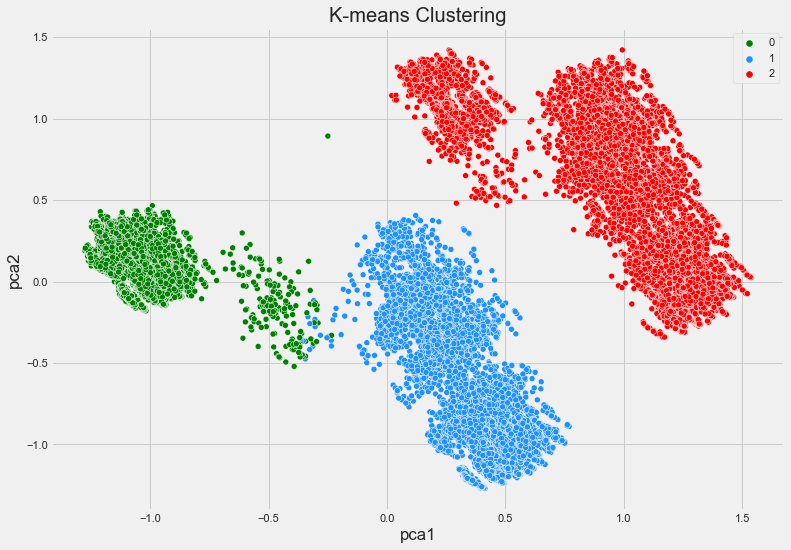

In [95]:
# the number of components to which the dataset needs to be converted using PCA
pca_num_components = 2
# calculating the PCA
reduced_data = PCA(n_components=pca_num_components).fit_transform(df)
# Saving the result as dataframe
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
# Plotting the clusters
sns.scatterplot(x="pca1", y="pca2", hue=cluster1, data=results, palette=['green','dodgerblue','red'])
# Setting the title of the plot
plt.title('K-means Clustering')
plt.show()

<b>Observations:</b>
<br>
We can obseve that all the 3 clusters are well-defined

<center><h1>Cluster Analysis</h1></center>

In [96]:
# Saving the income column in the original dataset
df1['income'] = income
# Saving the cluster which each datapoint belongs to
df1['cluster']= cluster1

<b>Note:</b> To better understand the data which constitute of a particular cluster, we are again adding income column in addition to cluster

In [97]:
# Understanding the overall measures
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48789 entries, 0 to 48842
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48789 non-null  int32  
 1   workclass       48789 non-null  object 
 2   fnlwgt          48789 non-null  float64
 3   education       48789 non-null  object 
 4   education-num   48789 non-null  float64
 5   martial-status  48789 non-null  object 
 6   occupation      48789 non-null  object 
 7   relationship    48789 non-null  object 
 8   race            48789 non-null  object 
 9   sex             48789 non-null  object 
 10  capital-gain    48789 non-null  float64
 11  capital-loss    48789 non-null  float64
 12  hours-per-week  48789 non-null  float64
 13  native-country  48789 non-null  object 
 14  income          48789 non-null  object 
 15  cluster         48789 non-null  int32  
dtypes: float64(5), int32(2), object(9)
memory usage: 6.0+ MB


<b>Note:</b> We can see that column income and cluster have been added to the dataset

In [98]:
# Getting the stats for data present in cluster 0
df1[df1.cluster==0].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,cluster
count,19879.000000,1.987900e+04,19879.000000,19879.000000,19879.000000,19879.000000,19879.0
mean,43.811409,1.874329e+05,10.293777,1765.469239,121.504905,44.151165,0.0
std,12.080152,1.039370e+05,2.747685,9808.185175,470.330578,11.775999,0.0
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.0
25%,35.000000,1.160165e+05,9.000000,0.000000,0.000000,40.000000,0.0
50%,43.000000,1.762790e+05,10.000000,0.000000,0.000000,40.000000,0.0
75%,52.000000,2.351520e+05,13.000000,0.000000,0.000000,50.000000,0.0
max,90.000000,1.490400e+06,16.000000,99999.000000,2603.000000,99.000000,0.0


<b>Observations:</b>
<br>
Cluster 0 has the mean age of 43.81 years with median age being 43 years.
<br>
Cluster 0 has the mean capital-gain of 1765.46.
<br>
Cluster 0 has the mean capital-loss of 121.5.
<br>
Cluster 0 has the mean hours-per-week being 44 hours with a standard deviation of 11.77 hours

In [99]:
# Getting the mode for data present in cluster 0
df1[df1.cluster==0].mode(numeric_only=True)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,cluster
0,38,125892.0,9.0,0.0,0.0,40.0,0


<b>Observations:</b>
<br>
Cluster 0 has the most record having the age of 38 years

In [100]:
# Getting the stats for data present in cluster 1
df1[df1.cluster==1].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,cluster
count,12736.000000,1.273600e+04,12736.000000,12736.000000,12736.000000,12736.000000,12736.0
mean,32.777246,1.984683e+05,9.786589,644.231941,67.759187,39.718750,1.0
std,12.590369,1.106013e+05,2.485323,5346.142336,357.000796,12.161802,0.0
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,1.0
25%,23.000000,1.216475e+05,9.000000,0.000000,0.000000,38.000000,1.0
50%,30.000000,1.862240e+05,10.000000,0.000000,0.000000,40.000000,1.0
75%,40.000000,2.517082e+05,11.000000,0.000000,0.000000,45.000000,1.0
max,90.000000,1.455435e+06,16.000000,99999.000000,3770.000000,99.000000,1.0


<b>Observations:</b>
<br>
Cluster 1 has the mean age of 32 years with median age being 30 years.
<br>
Cluster 1 has the mean capital-gain of 644.23.
<br>
Cluster 1 has the mean capital-loss of 67.79.
<br>
Cluster 1 has the mean hours-per-week being 39.7 hours with a standard deviation of 12.16 hours

In [101]:
# Getting the mode for data present in cluster 1
df1[df1.cluster==1].mode(numeric_only=True)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,cluster
0,23,190290.0,9.0,0.0,0.0,40.0,1


<b>Observations:</b>
<br>
Cluster 1 has the most record having the age of 23 years

In [102]:
# Getting the stats for data present in cluster 2
df1[df1.cluster==2].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,cluster
count,16174.000000,1.617400e+04,16174.000000,16174.000000,16174.000000,16174.000000,16174.0
mean,36.940151,1.854903e+05,10.044701,581.372573,61.543898,36.404105,2.0
std,14.137872,1.032309e+05,2.378523,5097.027392,340.295054,11.948479,0.0
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,2.0
25%,25.000000,1.165540e+05,9.000000,0.000000,0.000000,30.000000,2.0
50%,35.000000,1.755550e+05,10.000000,0.000000,0.000000,40.000000,2.0
75%,46.000000,2.285595e+05,12.000000,0.000000,0.000000,40.000000,2.0
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,2.0


<b>Observations:</b>
<br>
Cluster 2 has the mean age of 36.9 years with median age being 35 years.
<br>
Cluster 2 has the mean capital-gain of 581.32.
<br>
Cluster 2 has the mean capital-loss of 61.54.
<br>
Cluster 2 has the mean hours-per-week being 36.4 hours with a standard deviation of 11.94 hours

In [103]:
# Getting the mode for data present in cluster 2
df1[df1.cluster==2].mode(numeric_only=True)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,cluster
0,23,117789.0,9.0,0.0,0.0,40.0,2


<b>Observations:</b>
<br>
Cluster 2 has the most record having the age of 23 years

<AxesSubplot:xlabel='workclass'>

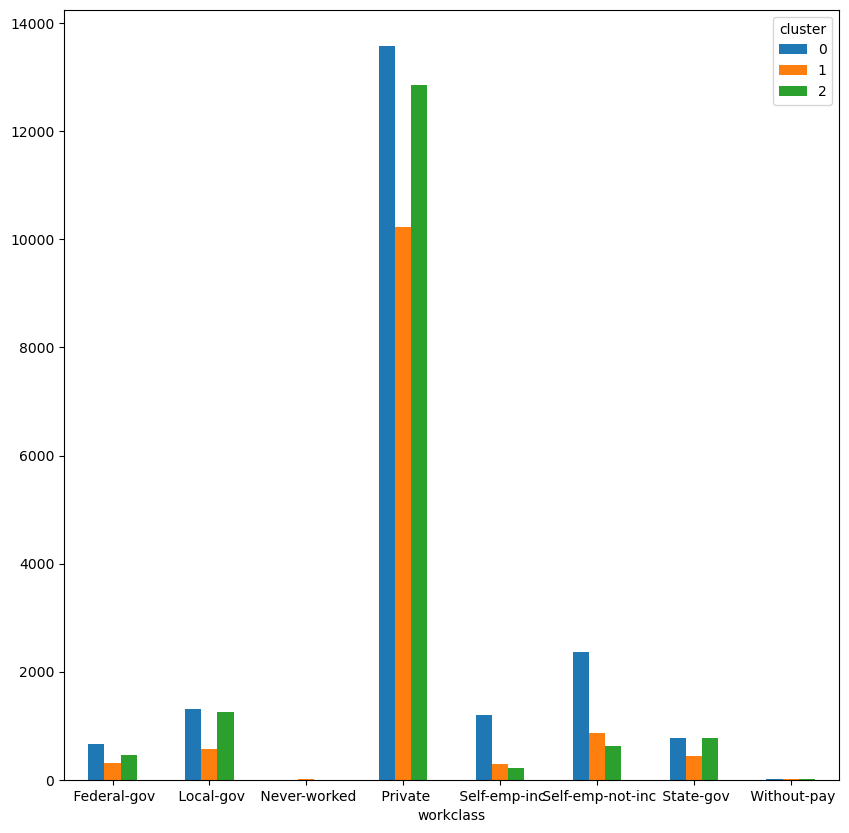

In [104]:
# Setting the style of graph to be used
plt.style.use('default')
# Plotting the column workclass and cluster as bar graph to observe the distribution of values
bargraph(df1,'workclass','cluster')

<b>Observations:</b>
<br>
In all the categories in workclass, we observe a similar trend that, most records are in cluster 0.
<br>
Private, Federal-gov, Self-emp-inc and Self-emp-not-inc follow a similar trend. Most records are in Cluster 0, followed by Cluster 2 and then Cluster 1.
<br>
Local-gov and State-gov follow nearly similar trend. In both the categories, records in Cluster 0 and Cluster 2 are nearly the same.
<br>
We don't see many records in Never-Worked and Without-pay category. In never-worked, we are able to see small number of records in Cluster 1 and in Without-pay, small number which are nearly equal in all the clusters 

<AxesSubplot:xlabel='education'>

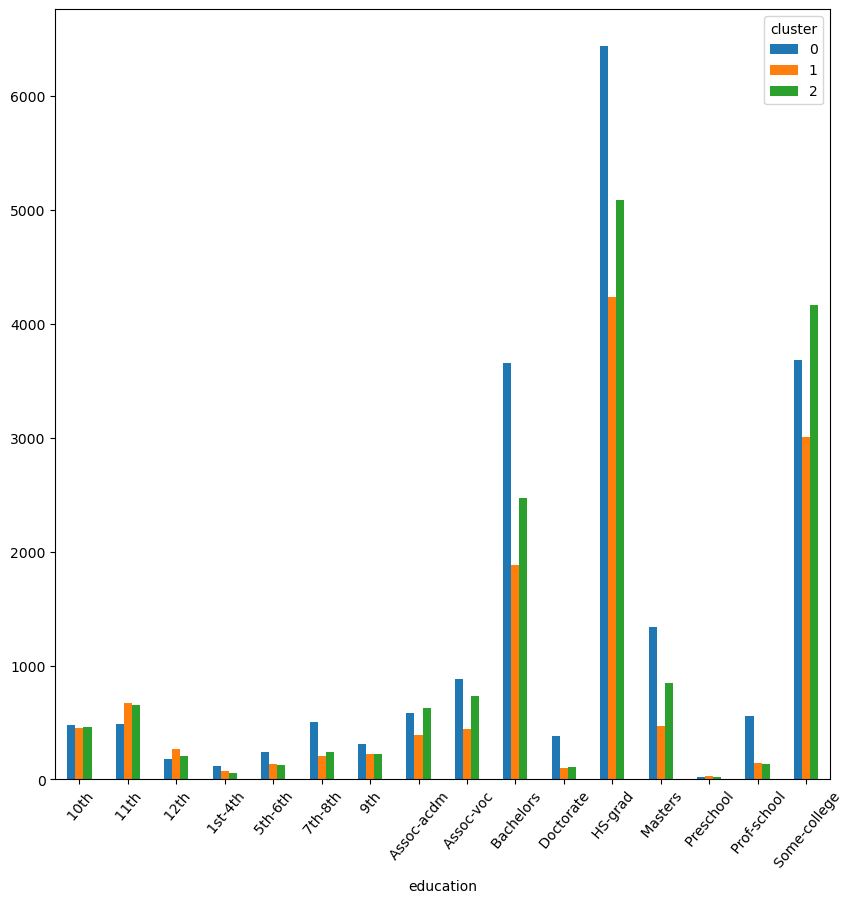

In [105]:
# Plotting the column education and cluster as bar graph to observe the distribution of values
bargraph(df1,'education','cluster',50)

<b>Observations:</b>
<br>
7th-8th, 9th, Assoc-voc, Bachelors, HS-grad and Masters majorly fall in Cluster 0, followed by Cluster 2 and then Cluster 1.
<br>
10th, 5th-6th, 9th Doctorate and Prof-school majorly fall in Cluster 0 and nearly equal numbers are present in Cluster 1 and 2.
<br>
11th have nearly same records in cluster 1 and 2, then cluster 0.
<br>
12th majory fall in Cluster 1 followed by Cluster 2 and then Cluster 0.
<br>
1st-4th majorly fall in cluster 0 followed by 1 and then 2.
<br>
Assoc-acdm and Some college fall majorly in Cluster 2 followed by Cluster 0 and then Cluster 1
<br>
Preschool is nearly having same number of records in all the clusters

<AxesSubplot:xlabel='martial-status'>

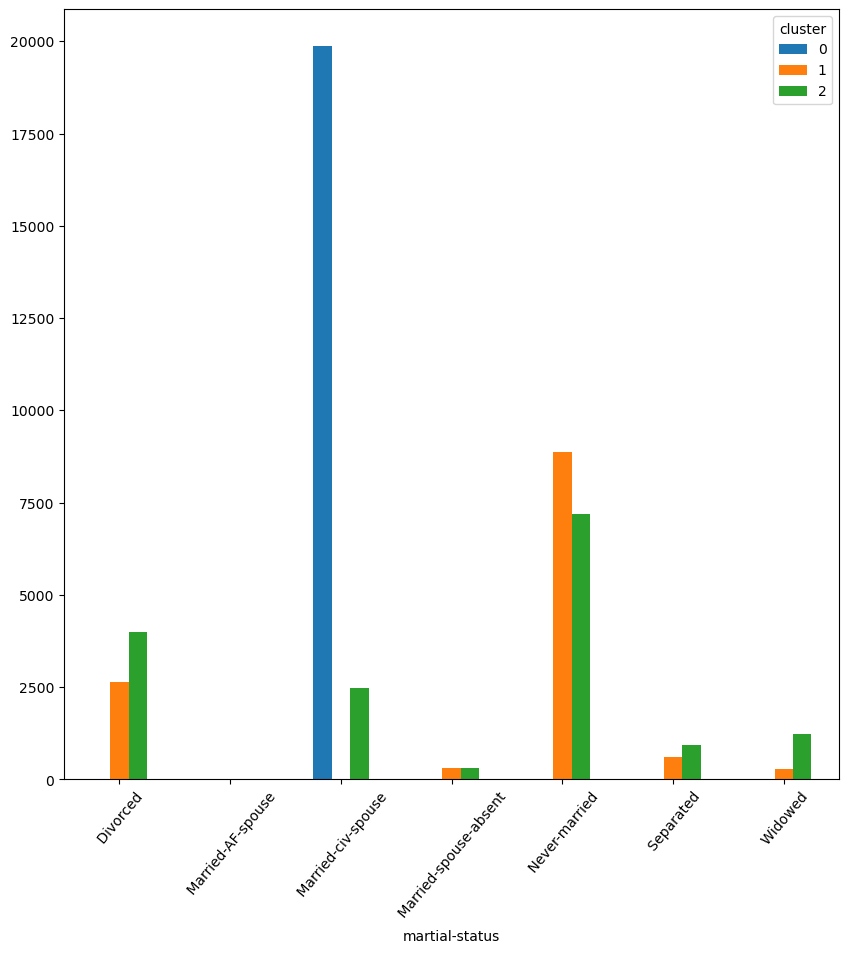

In [106]:
# Plotting the column martial-status and cluster as bar graph to observe the distribution of values
bargraph(df1,'martial-status','cluster',50)

<b>Observations:</b>
<br>
No category in martial-status is falling in Cluster 0 except Married-civ-spouse. Married-civ-spouse is divided in Cluster 0 and Cluster 2 with major being in Cluster 0.
<br>
Divorced, Separated and Widowed are majorly falling in Cluster 2 followed by Cluster 1
<br>
Never-married is majorly falling in Cluster 1 and then Cluster 2.
<br>
Married-spouse-absent is having equal number in Cluster 1 and Cluster 2.

<AxesSubplot:xlabel='occupation'>

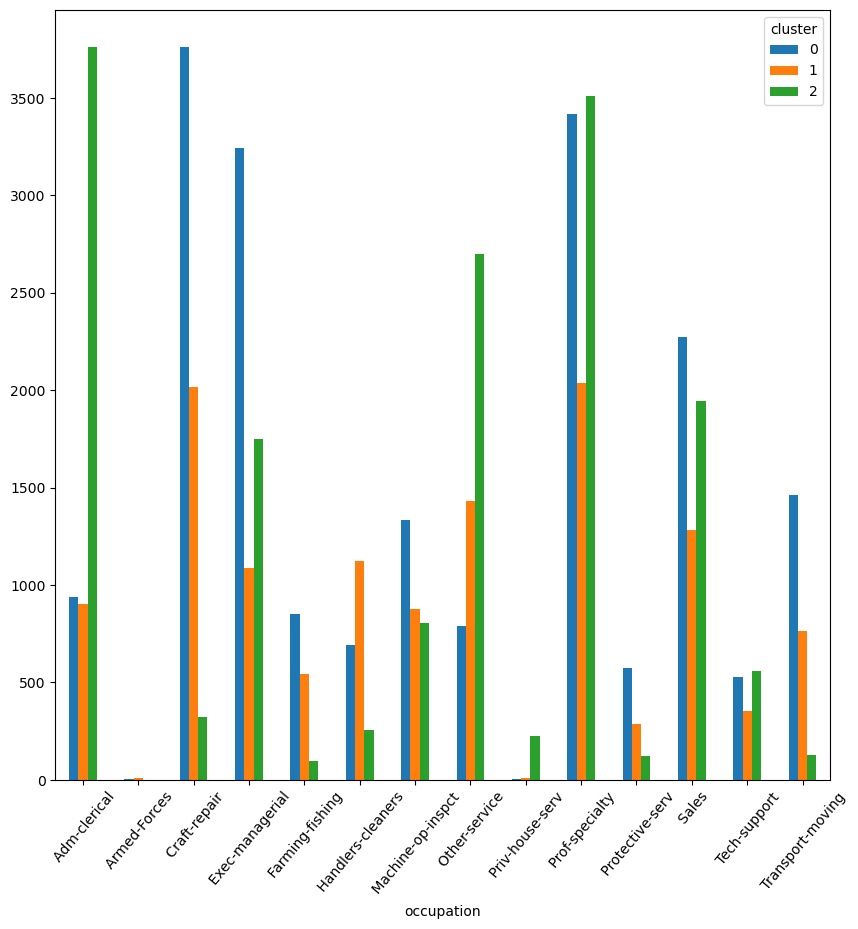

In [107]:
# Plotting the column occupation and cluster as bar graph to observe the distribution of values
bargraph(df1,'occupation','cluster',50)

<b>Observations:</b>
<br>
Adm-clerical, Prof-specialty and Tech-support occupation majorly fall in Cluster 2 followed by cluster 0 and then cluster 1
<br>
Craft-repair, Farming-fishing, Machine-op-inspct, Protective-serv and Transport-moving occupation is majorly coming in Cluster 0 followed by Cluster 1 and then Cluster 2
<br>
Exec-managerial and Sales majorly fall in Cluster 0 followed by Cluster 2 and then Cluster 1.
<br>
Handlers-cleaners majorly fall in Cluster 1 followed by Cluster 0 and then Cluster 2.
<br>
Other-service and Priv-house-serv majorly fall in Cluster 2 followed by Cluster 1 and then Cluster 0.

<AxesSubplot:xlabel='relationship'>

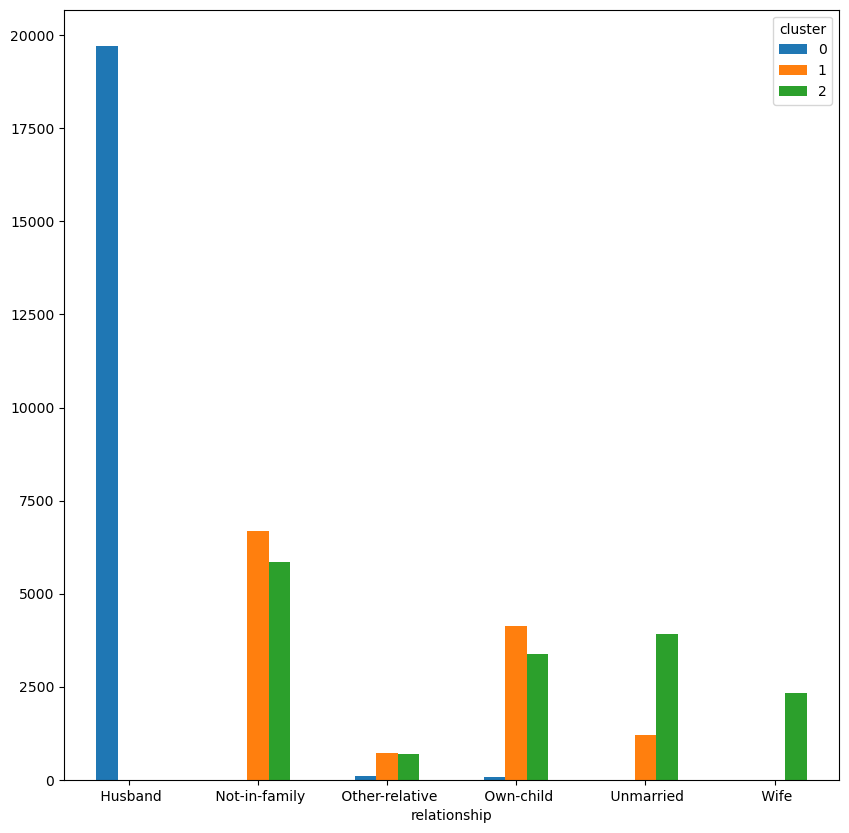

In [108]:
# Plotting the column relationship and cluster as bar graph to observe the distribution of values
bargraph(df1,'relationship','cluster')

<b>Observations:</b>
<br>
All having relationship as Husband are falling in cluster 0 and all having relationship as wife are falling in cluster 2.
<br>
Not-in-family relationship majorly fall in Cluster 1 followed by Cluster 2
<br>
Other-relative have nearly equal numbers in cluster 1 and cluster 2 but there are also small number in cluster 0
<br>
Own-Child having majority records in Cluster 1 followed by Cluster 2 and then Cluster 0.
<br>
Unmarried is divided into Cluster 1 and Cluster 2. Cluster 2 having more records compared to Cluster 1

<AxesSubplot:xlabel='race'>

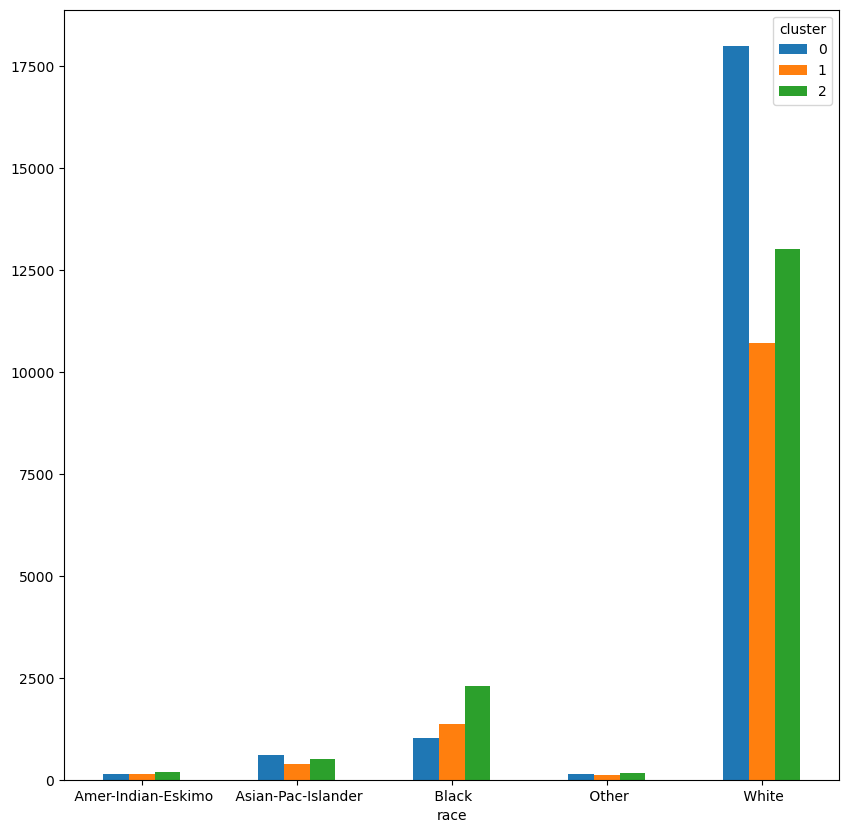

In [109]:
# Plotting the column race and cluster as bar graph to observe the distribution of values
bargraph(df1,'race','cluster')

<b>Observations:</b>
<br>
For White and Asian-Pac-Islander race, majority are falling in cluster 0, followed by cluster 2 and then cluster 1.
<br>
For black race, majority are falling in cluster 2, followed by cluster 1 and then cluster 0.
<br>
For Amer-Indian-Eskimo and Other, majority are falling in cluster 2, and other two cluster having nearly equal numbers.

<AxesSubplot:xlabel='sex'>

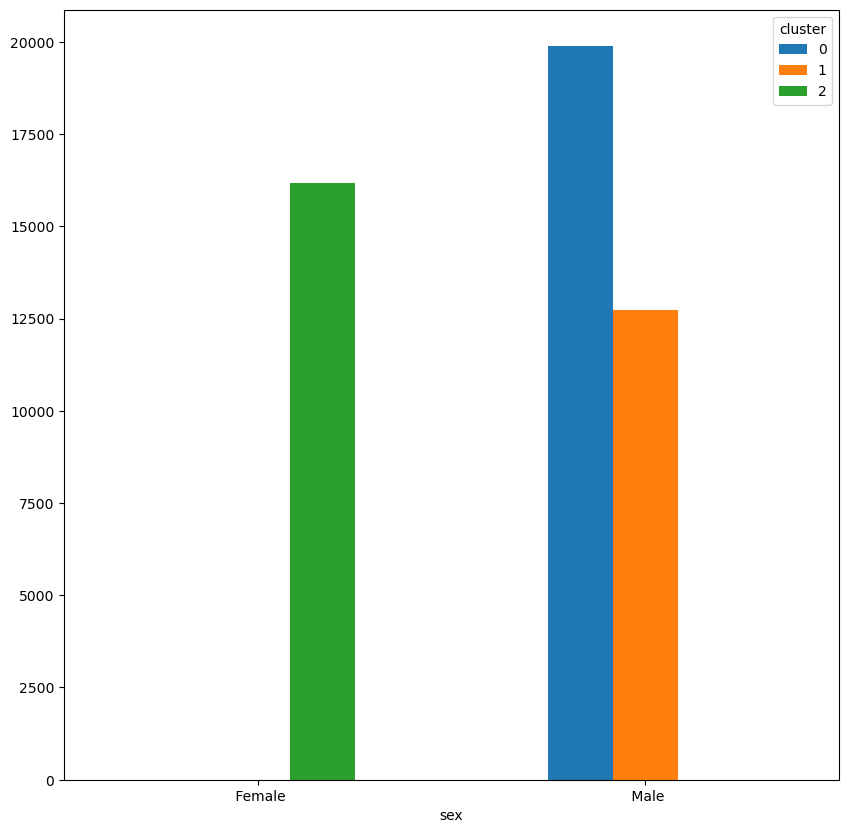

In [110]:
# Plotting the column sex and cluster as bar graph to observe the distribution of values
bargraph(df1,'sex','cluster')

<b>Observations:</b>
<br>
Male and Female have been divided into 2 parts where all the female are falling in cluster 2 and all the male are falling in cluster 0 and 1. Cluster 0 having more male compared to cluster 1

In [111]:
def getCountryCount(X,cluster):
    '''This function returns the number of countries in a particular cluster'''
    # Getting the list of the countries present in a cluster
    country = X[X['cluster']==cluster]['native-country']
    # declaring a list to save the count of each country
    data = {}
    # looping over the country finding the total number of times a country is present in a cluster
    for i in country:
       #if the country is present in dictionary 
        if i in data.keys():
            # increase the count
            data[i]+= 1    
        else:
            # else, create the first entry
            data[i] = 1
    # sort the countries having the highest count to the lowest count
    data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse = True)}
    # return the result
    return data

In [112]:
# Getting the list f countries present in cluster 0 with their count
getCountryCount(df1,0)

{' United-States': 18190,
 ' Mexico': 418,
 ' Philippines': 115,
 ' India': 86,
 ' Germany': 82,
 ' Canada': 77,
 ' Cuba': 65,
 ' China': 65,
 ' Italy': 64,
 ' Puerto-Rico': 52,
 ' England': 45,
 ' South': 44,
 ' El-Salvador': 43,
 ' Japan': 41,
 ' Poland': 38,
 ' Portugal': 36,
 ' Greece': 31,
 ' Taiwan': 30,
 ' Dominican-Republic': 30,
 ' Vietnam': 30,
 ' Iran': 29,
 ' Columbia': 28,
 ' Jamaica': 27,
 ' Haiti': 24,
 ' Guatemala': 21,
 ' Ecuador': 20,
 ' Nicaragua': 15,
 ' France': 15,
 ' Yugoslavia': 14,
 ' Peru': 14,
 ' Ireland': 14,
 ' Cambodia': 13,
 ' Hong': 12,
 ' Thailand': 11,
 ' Trinadad&Tobago': 11,
 ' Laos': 9,
 ' Hungary': 8,
 ' Scotland': 7,
 ' Outlying-US(Guam-USVI-etc)': 4,
 ' Honduras': 1}

<b>Observations:</b>
<br>
Top three countries in cluster 0 are United States, Mexico and Phillipines

In [113]:
# Getting the list f countries present in cluster 1 with their count
getCountryCount(df1,1)

{' United-States': 11615,
 ' Mexico': 311,
 ' Philippines': 64,
 ' El-Salvador': 58,
 ' Puerto-Rico': 57,
 ' India': 47,
 ' Canada': 42,
 ' Guatemala': 41,
 ' Germany': 37,
 ' England': 37,
 ' South': 27,
 ' Vietnam': 26,
 ' Dominican-Republic': 25,
 ' Poland': 25,
 ' Columbia': 25,
 ' China': 24,
 ' Cuba': 23,
 ' Jamaica': 21,
 ' Haiti': 20,
 ' Japan': 20,
 ' Iran': 18,
 ' Portugal': 17,
 ' Taiwan': 16,
 ' Ireland': 14,
 ' Peru': 14,
 ' Italy': 13,
 ' Nicaragua': 12,
 ' Outlying-US(Guam-USVI-etc)': 10,
 ' Greece': 9,
 ' Cambodia': 9,
 ' Ecuador': 9,
 ' France': 9,
 ' Honduras': 8,
 ' Hong': 7,
 ' Scotland': 6,
 ' Laos': 5,
 ' Thailand': 5,
 ' Yugoslavia': 4,
 ' Hungary': 4,
 ' Trinadad&Tobago': 2}

<b>Observations:</b>
<br>
Top three countries in cluster 1 are United States, Mexico and Phillipines

In [114]:
# Getting the list f countries present in cluster 2 with their count
getCountryCount(df1,2)

{' United-States': 14842,
 ' Mexico': 214,
 ' Philippines': 115,
 ' Germany': 87,
 ' Puerto-Rico': 75,
 ' Canada': 63,
 ' Jamaica': 58,
 ' El-Salvador': 54,
 ' Cuba': 50,
 ' Dominican-Republic': 48,
 ' England': 45,
 ' South': 44,
 ' China': 33,
 ' Columbia': 32,
 ' Japan': 31,
 ' Haiti': 31,
 ' Vietnam': 30,
 ' Italy': 28,
 ' Poland': 24,
 ' Guatemala': 24,
 ' Nicaragua': 22,
 ' Taiwan': 19,
 ' India': 18,
 ' Peru': 18,
 ' Ecuador': 16,
 ' France': 14,
 ' Trinadad&Tobago': 14,
 ' Portugal': 14,
 ' Thailand': 14,
 ' Iran': 12,
 ' Honduras': 11,
 ' Hong': 11,
 ' Laos': 9,
 ' Outlying-US(Guam-USVI-etc)': 9,
 ' Ireland': 9,
 ' Greece': 9,
 ' Scotland': 8,
 ' Hungary': 7,
 ' Cambodia': 6,
 ' Yugoslavia': 5,
 ' Holand-Netherlands': 1}

<b>Observations:</b>
<br>
Top three countries in cluster 2 are United States, Mexico and Phillipines

<AxesSubplot:xlabel='income'>

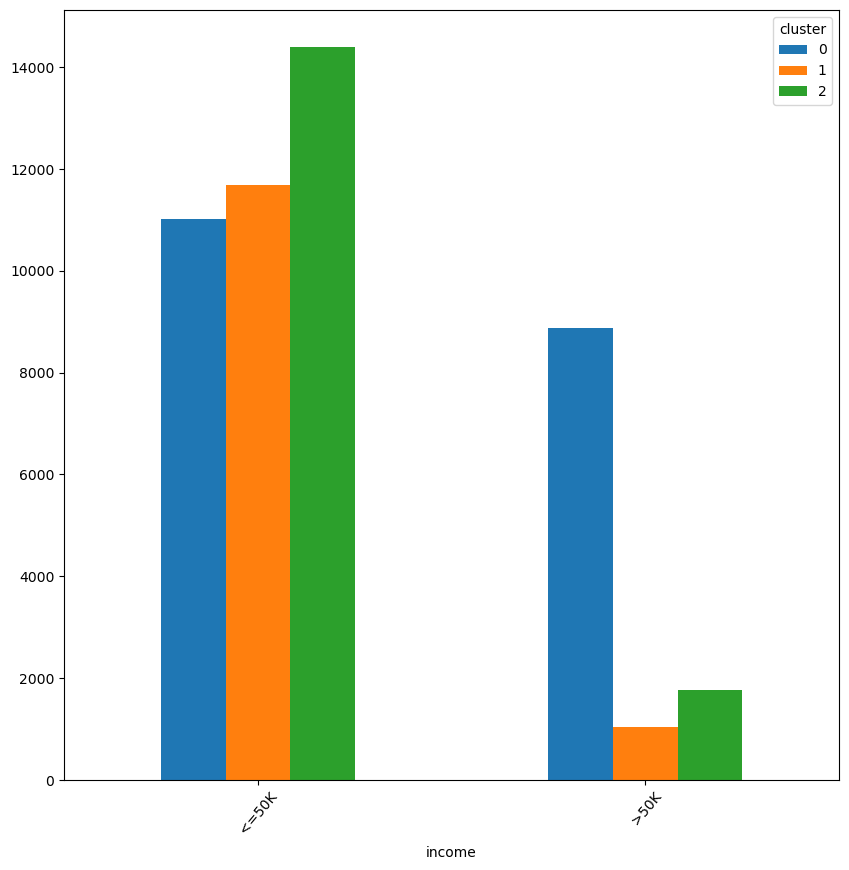

In [115]:
# Plotting the column income and cluster as bar graph to observe the distribution of values
bargraph(df1,'income','cluster',50)

<b>Observations:</b>
<br>
The above bar graph shows that most records having income of <=50k fall in cluster 2 followed by cluster 1 and then cluster 0
<br>
The above bar graph shows that most records having income of >50k fall in cluster 0 followed by cluster 2 and then cluster 1